<h3>Import Necessary Libraries</h3>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import json
import pickle
import re

<h3>Ingest ICICI Bank Churn Data</h3>


In [2]:
df = pd.read_csv(r"F:\Udemy\Git\ML Portfolio\Flask Apps\ICICI Customers Churn App\Data\Bank_Churn.csv")
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<h3>Exploratory Data Analysis</h3>


In [5]:
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df["Surname"] = df["Surname"].str.strip()
df["Geography"] = df["Geography"].str.strip()
df["Gender"] = df["Gender"].str.strip()

In [10]:
df1 = df.drop(columns=["CustomerId","Surname"])

In [11]:
fig = px.imshow(df1.corr(numeric_only=True),text_auto=True)
fig.show()

In [12]:
for col in df1.select_dtypes(include="number").columns.tolist():
    fig = px.box(df1,y=col)
    fig.show()

In [13]:
df1["Exited"].value_counts(dropna=False,normalize=True)*100  ## One Category is dominating

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

In [14]:
df1["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

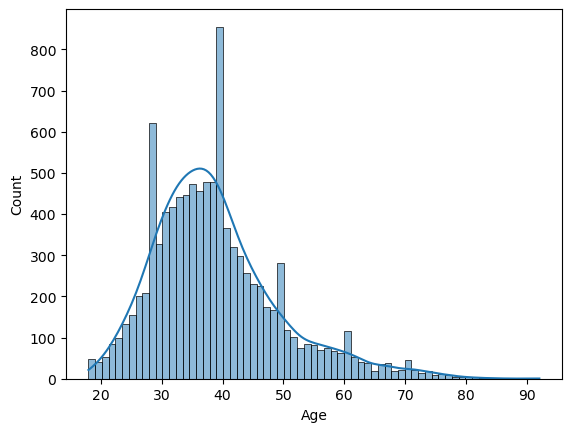

In [15]:
sns.histplot(df1["Age"],kde=True)

<h3>Feature Engineering (Pre Model)</h3>


In [16]:
## Added Credit Score Bucket For Website Demonstration

conditions = [
    df["CreditScore"].between(300,500),
    df["CreditScore"].between(500,650),
    df["CreditScore"].between(650,800),
    df["CreditScore"] > 800
]

choices = [
    "Low Score (300–500)",
    "Medium Score (500–650)",
    "High Score (650–800)",
    "Very High Score (>800)"
]

df["CreditScoreBucket"] = np.select(conditions,choices,default="Unknown")

In [17]:
## Added Balance Range Feature For Website Demonstration

conditions = [
    df["Balance"].between(0,50000),
    df["Balance"].between(50000,100000),
    df["Balance"].between(100000,150000),
    df["Balance"].between(150000,200000),
    df["Balance"] > 200000
]

choices = [
    "0-50k",
    "50k-100k",
    "100k-150k",
    "150k-200k",
    "200k+"
]

df["BalanceRange"] = np.select(conditions,choices,default="Unknown") 

<h3>Model Building Process</h3>


In [18]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split,StratifiedKFold,HalvingGridSearchCV,GridSearchCV
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import *

In [36]:
## Implement Train Test Split

ind_cols = []
for col in df1.columns.tolist():
    if col != "Exited":
        ind_cols.append(col)

x = df1[ind_cols]
y = df1["Exited"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=25)

In [20]:
##  Commence Model Building

cat_features = x_train.select_dtypes(include="object").columns.tolist()
num_feature = ["CreditScore","Age","Balance","EstimatedSalary","Tenure"]
weights = compute_sample_weight("balanced",y_train)

numerical_transfomer = Pipeline(steps=[("scaler",StandardScaler())])
categorical_transfomer = Pipeline(steps=[("onehot",OneHotEncoder(sparse_output=False,handle_unknown="ignore"))])

preprocessing = ColumnTransformer(
    transformers=[
        ("num",numerical_transfomer,num_feature),
        ("cat",categorical_transfomer,cat_features)
    ],
    remainder="passthrough",
    n_jobs=-1
)

clf1 = LogisticRegression(random_state=25)
clf2 = SVC(probability=True,random_state=25)
clf3 = GaussianNB()
clf4 = GradientBoostingClassifier(random_state=25)
clf5 = RandomForestClassifier(random_state=25)
clf7 = KNeighborsClassifier()

param1a={}
param1a["classifier__penalty"] = ["l1","l2"]
param1a["classifier__class_weight"] = ["balanced"]
param1a["classifier__solver"] = ["saga","liblinear"]
param1a["classifier__C"] = [0.25,0.5,1.0,1.5,2.0,5.0]
param1a["classifier__max_iter"] = [100,200,400,800]
param1a["classifier"] = [clf1]

param1b={}
param1b["classifier__penalty"] = ["elasticnet"]
param1b["classifier__class_weight"] = ["balanced"]
param1b["classifier__solver"] = ["saga"]
param1b["classifier__C"] = [0.25,0.5,1.0,1.5,2.0,5.0]
param1b["classifier__max_iter"] = [100,200,400,800]
param1b["classifier__l1_ratio"] = [0.25,0.5,0.75]
param1b["classifier"] = [clf1]

param2={}
param2["classifier__C"] = [0.2,0.5,1.0,2.0]
param2["classifier__kernel"] = ["linear","poly","rbf","sigmoid"]
param2["classifier__class_weight"] = ["balanced"]
param2["classifier"] = [clf2]

param3={}
param3["classifier"] = [clf3]

param4={}
param4["classifier__loss"] = ["log_loss"]
param4["classifier__learning_rate"] = [0.1,0.25,0.5,0.75,1.0]
param4["classifier__n_estimators"] = [80,100,150,200]
param4["classifier__min_samples_leaf"] = [1,2,5,10]
param4["classifier__max_depth"] = [3,5,7,10]
param4["classifier"] = [clf4]

param5={}
param5["classifier__criterion"] = ["gini","entropy"]
param5["classifier__n_estimators"] = [100,150,200]
param5["classifier__min_samples_leaf"] = [1,2,5]
param5["classifier__min_samples_split"] = [2,5,10]
param5["classifier__max_leaf_nodes"] = [5,10,None]
param5["classifier__max_depth"] = [5,10,None]
param5["classifier__class_weight"] = ["balanced","balanced_subsample"]
param5["classifier"] = [clf5]

param7={}
param7["classifier__n_neighbors"]=[3,5,7,10]
param7["classifier__weights"]=["uniform","distance"]
param7["classifier__algorithm"]=["ball_tree","kd_tree"]
param7["classifier__leaf_size"]=[20,30,40]
param7["classifier__p"]=[1,2]
param7["classifier"] = [clf7]

skcv = StratifiedKFold(n_splits=5,shuffle=True,random_state=25)

pipeline = Pipeline(steps=[("preprocessor",preprocessing),("classifier",clf1)])
params = [param1a,param1b,param2,param3,param4,param5,param7]

grid = HalvingGridSearchCV(pipeline,params,cv=skcv,n_jobs=-1,scoring="roc_auc",error_score="raise",factor=2,verbose=1,min_resources=2000)
grid.fit(x_train,y_train)

In [22]:
# grid.best_score_

In [23]:
file_path = r"F:\Udemy\Git\ML Portfolio\Flask Apps\ICICI Customers Churn App\Model\bank_model.pkl"
with open(file_path,'wb') as load_model:
    pickle.dump(grid,load_model)

In [24]:
# y_pred = grid.predict(x_test)
# y_pred_proba = grid.predict_proba(x_test)[:,1]

In [25]:
# roc_auc_score(y_test,y_pred_proba)

In [26]:
# print(classification_report(y_test,y_pred))

In [27]:
# fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)

In [28]:
# thresholds

In [29]:
# plt.plot(fpr,tpr,"g",label="ROC Curve")
# plt.plot([0,1],[0,1],"r--",label="Random Guessing")
# for i in range(0,len(thresholds),45):
#     plt.text(fpr[i],tpr[i],f"{thresholds[i]:.2f}")
# plt.show()

In [30]:
# from sklearn.metrics import roc_curve

# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# j_scores = tpr - fpr
# best_thresh = thresholds[j_scores.argmax()]

# print("Best Threshold:", best_thresh)

In [31]:
# y_pred_opt = (y_pred_proba >= best_thresh).astype(int)
# print(classification_report(y_test,y_pred_opt))

In [32]:
# ## For XGBOOST
# clf6 = xgb.XGBClassifier(use_label_encoder=False,eval_metric="auc",objective="binary:logistic")

# param6={}
# param6["model__learning_rate"] = [0.1,0.25,0.5,1.0]
# param6["model__n_estimators"] = [100,150,200]
# param6["model__max_depth"] = [3,5,10,15]
# param6["model__subsample"] = [0.5,0.75,1.0]
# param6["model"] = [clf6]

# pipeline_xgb = Pipeline(steps=[("xgb_preprocess",preprocessing),("model",clf6)])
# grid_xgb = GridSearchCV(pipeline_xgb,param_grid=[param6],cv=skcv,n_jobs=1,scoring="roc_auc",error_score="raise",verbose=1)
# grid_xgb.fit(x_train, y_train)

<h3>Load Saved Model</h3>


In [21]:
file_path = r"F:\Udemy\Git\ML Portfolio\Flask Apps\ICICI Customers Churn App\Model\bank_model.pkl"
with open(file_path,'rb') as ingest_model:
    model = pickle.load(ingest_model)

In [77]:
## Load and save the best parameter from grid

best_pipeline = model.best_estimator_
with open(file_path,'wb') as load_pipeline:
    pickle.dump(best_pipeline,load_pipeline)

In [78]:
## Ingest saved best pipeline

with open(file_path,'rb') as ingest_pipeline:
    pipeline = pickle.load(ingest_pipeline)

In [80]:
y_pred = pipeline.predict(x_test)
y_pred_proba = pipeline.predict_proba(x_test)[:,1]

In [81]:
## Print Classification Report With Default Threshold 0.5

print(classification_report(y_test,y_pred))  ## Recall is too low because of default threshold 
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2017
           1       0.76      0.48      0.59       483

    accuracy                           0.87      2500
   macro avg       0.83      0.72      0.76      2500
weighted avg       0.86      0.87      0.86      2500

[[1946   71]
 [ 252  231]]


In [82]:
## Find best & efficient threshold (High TPR[Recall] & Low FPR)

fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)

# Implement Youden's J Statistic  (Select Max Value)
j_scores = tpr-fpr

best_threshold = thresholds[j_scores.argmax()]   ## Return Position Of That Max Value

print(f"Best Threshold : {best_threshold}")

Best Threshold : 0.2129295970779435


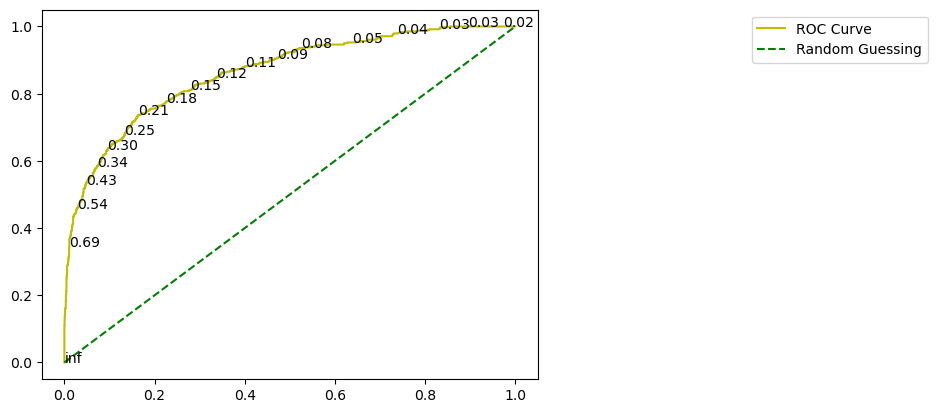

In [83]:
## Plot ROC Curve

plt.plot(fpr,tpr,color="y",label="ROC Curve")
plt.plot([0,1],[0,1],"g--",label="Random Guessing")
for i in range(0,len(thresholds),40):
    plt.text(fpr[i],tpr[i],f"{thresholds[i]:.2f}")
plt.legend(bbox_to_anchor = (1,1,0.8,0))
plt.show()

In [84]:
y_pred_new = (y_pred_proba >= best_threshold).astype("int")
print(classification_report(y_test,y_pred_new))
print(confusion_matrix(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      2017
           1       0.52      0.74      0.61       483

    accuracy                           0.82      2500
   macro avg       0.72      0.79      0.74      2500
weighted avg       0.85      0.82      0.83      2500

[[1686  331]
 [ 127  356]]


<h3>SHAP Evaluation</h3>


In [91]:
preprocessor = pipeline.named_steps["preprocessor"]
ml_model = pipeline.named_steps["classifier"]
preprocessor.n_jobs = 1

In [112]:
df2_ind = df1.drop("Exited",axis=1)
df2_target = df1["Exited"]

In [116]:
x_test_transformed = preprocessor.transform(df2_ind)
feature_names = preprocessor.get_feature_names_out()

In [117]:
import shap
explainer = shap.TreeExplainer(ml_model)
shap_values = explainer.shap_values(x_test_transformed)

In [158]:
customer_id = 15634602
idx = df.index[df["CustomerId"]==customer_id][0]

In [159]:
customer_shap = shap_values[idx]
customer_data = x_test_transformed[idx]

In [160]:
exp = shap.Explanation(
    values=customer_shap,
    base_values=explainer.expected_value,
    data=customer_data,
    feature_names=feature_names
)

In [185]:
abs_vals = np.abs(exp.values)
top_idx = abs_vals.argsort()[::-1][:3]
top_factors = [
    f"{exp.feature_names[i]}:{exp.values[i]:.3f}"
    for i in top_idx
]

In [186]:
top_factors

['remainder__NumOfProducts:0.734',
 'num__Age:0.315',
 'remainder__IsActiveMember:-0.258']

<h3>Feature Engineering (Post Model)</h3>


In [192]:
## Add Risk Category Feature

probs = pipeline.predict_proba(df2_ind)[:,1]
df["ChurnProbability"] = probs

conditions = [
    df["ChurnProbability"] >= 0.65,
    df["ChurnProbability"] >= 0.22,
    df["ChurnProbability"] < 0.22
]

choices = [
    "High",
    "Medium",
    "Low"
]

df["RiskCategory"] = np.select(conditions,choices,default="Low")

In [199]:
## Add Contact Priority Level (For RM Teams)

# Add Contact Priority Feature
cp_conditions = [
    df["Exited"] == 1,
    df["ChurnProbability"] >= 0.7,
    df["ChurnProbability"] >= 0.5,
    df["ChurnProbability"] >= 0.35,
    df["ChurnProbability"] >= 0.2,
    df["ChurnProbability"] < 0.2
]

cp_choices = [
    "Churned",
    "Very High",
    "High",
    "Medium",
    "Moderate",
    "Low"
]

df["ContactPriority"] = np.select(cp_conditions,cp_choices)

# Add Contact Timings Feature
ct_conditions = [
    df["ContactPriority"] == "Churned",
    df["ContactPriority"] == "Very High",
    df["ContactPriority"] == "High",
    df["ContactPriority"] == "Medium",
    df["ContactPriority"] == "Moderate",
    df["ContactPriority"] == "Low"
]

ct_choices = [
    "Not Required",
    "24 Hrs",
    "36 Hrs",
    "48 Hrs",
    "72 Hrs",
    "1 Week"
]

df["RecommendedContact"] = np.select(ct_conditions,ct_choices)